In [136]:
import requests 
import numpy as np
import json
import os
from dotenv import load_dotenv
import pandas as pd
from pandas import json_normalize
import time
load_dotenv()
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'


# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
#carga stone_enriquecido
Stones_Last = pd.read_csv("../data/stone_500_rich.csv")
Stones_Last.drop(["Unnamed: 0"], axis = 1, inplace = True)
Stones_Last.sample(3)

,Number,Year,Album,Artist,Type,Rating,Gen,playcount,listeners
316,317,1958,Lady in Satin,Billie Holiday,Album,5.00,jazz,1130950,124543
224,225,2002,Yankee Hotel Foxtrot,Wilco,Album,4.35,folk,16533596,754664
425,426,1988,Lucinda Williams,Lucinda Williams,Album,4.65,country,235872,17543


#### Gráfico de barras qué muestra cuantos usuarios han reproducido los 20 mejor valorados de Rolling Stone.

In [46]:
fig = px.bar(Stones_Last.head(20), x="Album", y="listeners",color = "Number")
fig.show()

In [41]:
Stone_last_art= Stones_Last.groupby(["Artist"]).agg({"Number":"min","Album":"count","playcount":"sum","listeners":"sum","Rating":"mean"}).reset_index().sort_values("Number")

In [9]:
Stones_Last.columns

Index(['Number', 'Year', 'Album', 'Artist', 'Type', 'Rating', 'Gen',
       'playcount', 'listeners'],
      dtype='object')

In [54]:
#correlación entre la posición en lista de rolling stone y los oyentes de estos discos en lastfm
fig = px.scatter(Stones_Last, x="Number", y="listeners", color="Artist", title = "Correlación posición lista y oyentes de lastfm")
fig.show()

### Agrupación por año de número de álbumes en lista y suma de oyentes y reproducciones en lastfm

In [63]:
by_year = Stones_Last.groupby(["Year"]).agg({"Album":"count","listeners":"sum","playcount":"sum"}).reset_index()

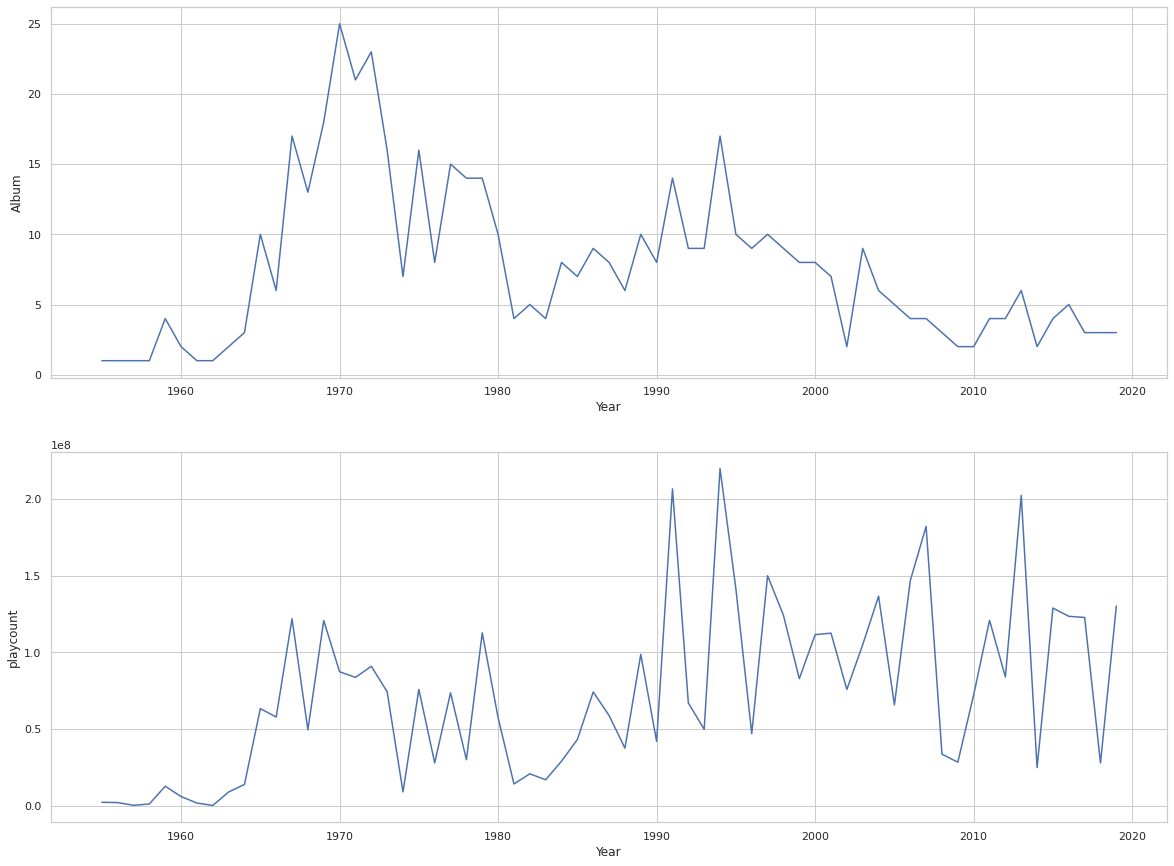

In [80]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,15))
sns.lineplot(data=by_year, x="Year", y="Album", ax=axs[0])
sns.lineplot(data=by_year, x="Year", y="playcount",ax=axs[1]);


In [69]:
year_alb = px.line(by_year, x="Year", y="Album", title = "albumes en la lista por año")
year_alb.show()

In [70]:
year_reps = px.line(by_year, x="Year", y="playcount", title = "reproducciones por año")
year_reps.show()

In [81]:
Stone_last_art.head(50)

,Artist,Number,Album,playcount,listeners,Rating
177,Marvin Gaye,1,3,7520622,829367,4.316667
279,The Beach Boys,2,3,14032572,582632,4.150000
139,Joni Mitchell,3,4,13961262,887920,4.362500
269,Stevie Wonder,4,4,14657588,1698675,4.775000
280,The Beatles,5,9,174054342,5759723,4.400000
205,Nirvana,6,3,101694931,5325588,4.283333
97,Fleetwood Mac,7,1,23169995,1117937,4.600000
226,Prince & The Revolution,8,4,1925638,253819,4.125000
35,Bob Dylan,9,7,51982102,2997669,4.314286
156,Lauryn Hill,10,1,9417617,780979,4.150000


## comparativa reproducciones spotify - lastfm

In [156]:
Spotify = pd.read_csv("../data/Spotify_500.csv")
Spotify.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [157]:
Spotify.columns

Index(['Rank', 'Artist', 'Album', 'Total', 'Daily'], dtype='object')

In [158]:
#agrupamos los artistas de spotify por la suma de sus totales y nos quedamos con lso 50 primeros
Spotify_art = Spotify.groupby(["Artist"]).agg({"Album":"count","Total": "sum", "Daily":"sum"}).reset_index().sort_values("Total" ,ascending=False)

In [163]:
spot_last_merge = Spotify.merge(Stones_Last, how='left', on = "Artist")

In [164]:
spot_last = spot_last_merge[["Rank","Artist","Album_x","Total","Number","playcount","listeners"]]
spot_last.Number= spot_last.Number.fillna(0)
spot_last.playcount=spot_last.playcount.fillna(0)
spot_last.listeners=spot_last.listeners.fillna(0)
spot_last[["Number","playcount","listeners"]] = spot_last[["Number","playcount","listeners"]].astype("int64")
spot_last["en_lista"] = np.where(spot_last["Number"] == 0, "no","sí")

In [165]:
fig_enlista = px.bar(spot_last, x=spot_last.en_lista.value_counts().index, y=spot_last.en_lista.value_counts().values)

In [166]:
fig_enlista.show()

In [143]:
fig = px.scatter(spot_last, x="flipper_length_mm", y="body_mass_g")
fig.show()

,Rank,Artist,Album_x,Total,Number,playcount,listeners,en_lista
0,1,Ed Sheeran,÷ (Deluxe),11127100157,0,0,0,no
1,2,Post Malone,beerbongs & bentleys,9384072978,0,0,0,no
2,3,Dua Lipa,Dua Lipa (Complete Edition),8732775214,0,0,0,no
3,4,Post Malone,Hollywood's Bleeding,8617566505,0,0,0,no
4,5,Ed Sheeran,x (Wembley Edition),8391502029,0,0,0,no


## top sells

In [216]:
top_sells = pd.read_csv("../data/top_sells.csv")
top_sells.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [231]:
sells_art = top_sells.groupby(["Artist"]).agg({"Rank":"min","Title":"count","Millions":"sum"}).reset_index().sort_values("Millions", ascending = False)

In [233]:
sells_art.head(3)

,Artist,Rank,Title,Millions
15,Eagles,1,2,64
36,The Beatles,5,3,56
18,Garth Brooks,9,3,53


In [212]:
Stone_last_art= Stones_Last.groupby(["Artist"]).agg({"Number":"min","Album":"count","playcount":"sum","listeners":"sum","Rating":"mean"}).reset_index().sort_values("Number")

In [239]:
sells_merge= sells_art.merge(Stone_last_art,how="left",on = "Artist")

In [240]:
sells_merge

,Artist,Rank,Title,Millions,Number,Album,playcount,listeners,Rating
0,Eagles,1,2,64,NaN,NaN,NaN,NaN,NaN
1,The Beatles,5,3,56,NaN,NaN,NaN,NaN,NaN
2,Garth Brooks,9,3,53,NaN,NaN,NaN,NaN,NaN
3,Led Zeppelin,7,3,51,NaN,NaN,NaN,NaN,NaN
4,Pink Floyd,8,2,38,NaN,NaN,NaN,NaN,NaN
5,Michael Jackson,2,1,34,NaN,NaN,NaN,NaN,NaN
6,Whitney Houston,15,2,31,NaN,NaN,NaN,NaN,NaN
7,Bruce Springsteen,24,2,28,NaN,NaN,NaN,NaN,NaN
8,Backstreet Boys,30,2,27,NaN,NaN,NaN,NaN,NaN
9,AC/DC,4,1,25,NaN,NaN,NaN,NaN,NaN


In [ ]:
"""
graf = sns.histplot(x=titanic.Age, kde=True) #hemos guardado el gráfico como una variable
graf.axvline(x=titanic.Age.dropna().mean(), c="red", label="mean")
graf.axvline(x=titanic.Age.dropna().median(), c="green", label="median")
plt.legend()
graf.figure.savefig("../images/gráfico.png", dpi=1000)
"""